In [1]:
%matplotlib inline
import quantstats as qs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
def vdir(obj):
    return [x for x in dir(obj) if not x.startswith('_')]
# extend pandas functionality with metrics, etc.
qs.extend_pandas()

In [2]:
# fetch the daily returns for a stock
stock = qs.utils.download_returns('FB')

# show sharpe ratio
qs.stats.sharpe(stock)

# or using extend_pandas() :)
stock.sharpe()

0.563050399580607

In [3]:
# tickerList = ['TFLO','EMBH','IBTA.L','IBTU.L','SHV','DFNM']
tickerList = ['TFLO','IBTA.L','IBTU.L','SHV','USFR','PVI','OPER']

stocks = pd.DataFrame()
startDates = dict()
for i in tickerList:
    newStock = qs.utils.download_returns(i)
    stocks = pd.concat([stocks, newStock], axis=1)
    startDates[i]=newStock.index[0]

In [4]:
stocks.columns = tickerList
display(stocks.tail(3))
display(startDates)
display(startDates.keys())
maxStartDate = max(startDates.values())
display(maxStartDate)

,TFLO,IBTA.L,IBTU.L,SHV,USFR,PVI,OPER
2022-07-08 00:00:00,0.000000,-0.001246,0.0000,-0.000182,0.0,0.000402,0.00005
2022-07-11 00:00:00,-0.000198,0.001919,0.0000,-0.000182,0.0,-0.000402,0.00005
2022-07-12 00:00:00,NaN,-0.000192,-0.0001,NaN,NaN,NaN,NaN


{'TFLO': Timestamp('2014-02-04 00:00:00'),
 'IBTA.L': Timestamp('2017-04-13 00:00:00'),
 'IBTU.L': Timestamp('2019-02-20 00:00:00'),
 'SHV': Timestamp('2007-01-11 00:00:00'),
 'USFR': Timestamp('2014-02-04 00:00:00'),
 'PVI': Timestamp('2007-11-15 00:00:00'),
 'OPER': Timestamp('2018-07-11 00:00:00')}

dict_keys(['TFLO', 'IBTA.L', 'IBTU.L', 'SHV', 'USFR', 'PVI', 'OPER'])

Timestamp('2019-02-20 00:00:00')

In [5]:
print('utils')
print(vdir(qs.utils))
print('stats')
print(vdir(qs.stats))
print('plots')
print(vdir(qs.plots))
help(qs.stats.comp)
help(qs.utils.make_portfolio)

utils
['aggregate_returns', 'download_returns', 'exponential_stdev', 'group_returns', 'inspect', 'log_returns', 'make_index', 'make_portfolio', 'multi_shift', 'rebase', 'to_excess_returns', 'to_log_returns', 'to_prices', 'to_returns']
stats
['adjusted_sortino', 'autocorr_penalty', 'avg_loss', 'avg_return', 'avg_win', 'best', 'cagr', 'calmar', 'common_sense_ratio', 'comp', 'compare', 'compsum', 'conditional_value_at_risk', 'consecutive_losses', 'consecutive_wins', 'cpc_index', 'cvar', 'distribution', 'drawdown_details', 'expected_return', 'expected_shortfall', 'exposure', 'gain_to_pain_ratio', 'geometric_mean', 'ghpr', 'greeks', 'implied_volatility', 'information_ratio', 'kelly_criterion', 'kurtosis', 'max_drawdown', 'monthly_returns', 'omega', 'outlier_loss_ratio', 'outlier_win_ratio', 'outliers', 'payoff_ratio', 'pct_rank', 'probabilistic_adjusted_sortino_ratio', 'probabilistic_ratio', 'probabilistic_sharpe_ratio', 'probabilistic_sortino_ratio', 'profit_factor', 'profit_ratio', 'r2', 

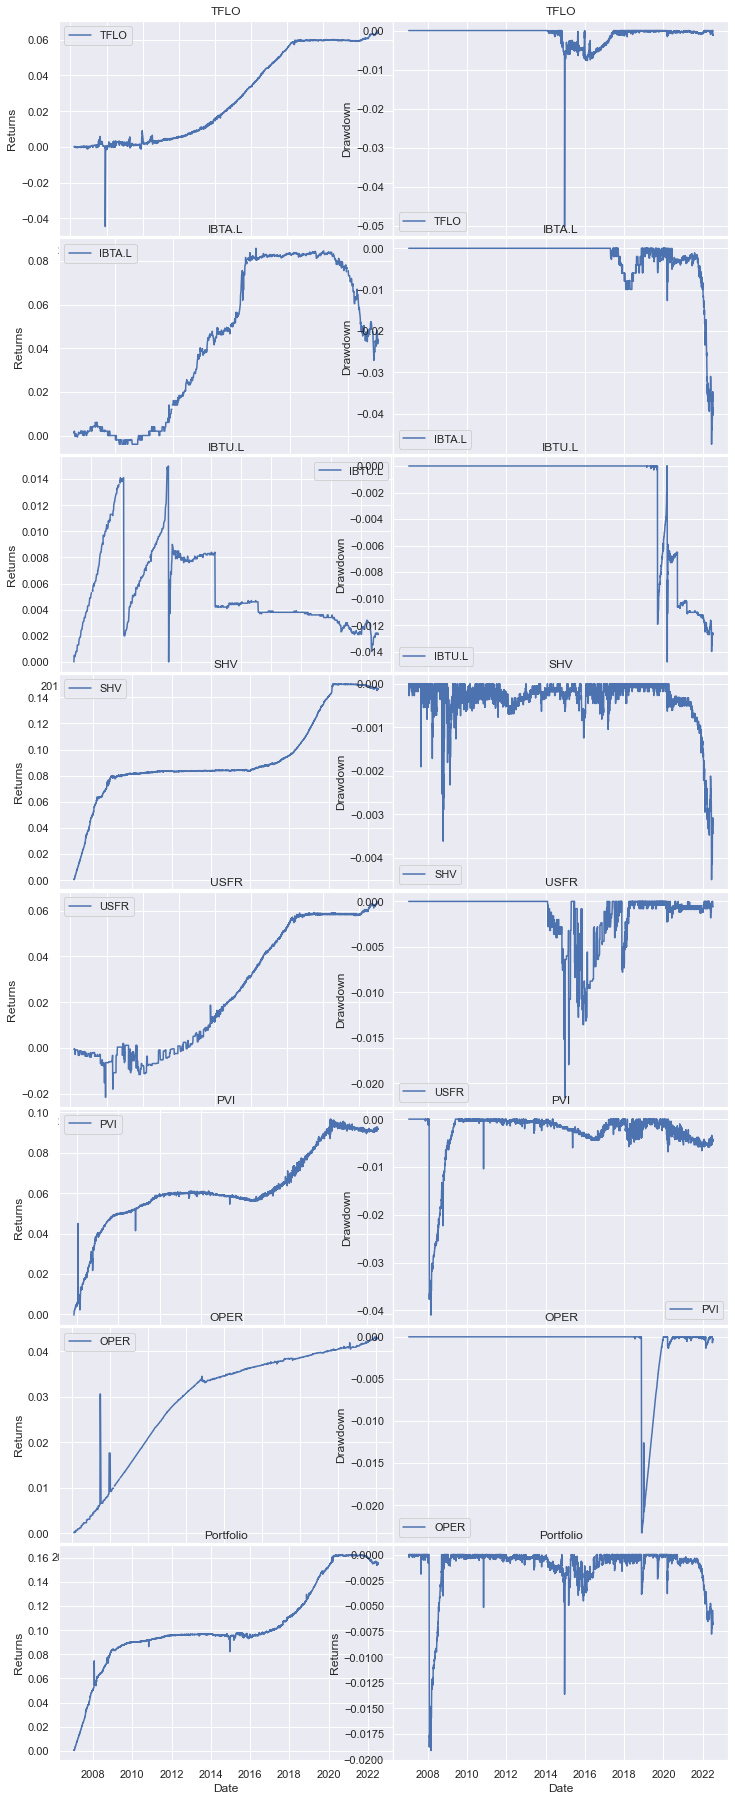

In [6]:
# portfolio = qs.utils.make_index(stocks)
n = stocks.shape[1]+1
# display(n)
portfolio = stocks.mean(axis=1)
fig, ax = plt.subplots(ncols=2, nrows=n,gridspec_kw = {'wspace':0, 'hspace':0.01}, figsize=(12,4*n))
fig.patch.set_facecolor('white')
for i, stock in enumerate(stocks.columns):
    ax[i,0].plot(qs.stats.compsum(stocks[stock]), label=stock)
    ax[i,0].legend()
    ax[i,0].set_title(stock)
    ax[i,0].set_xlabel('Date')
    ax[i,0].set_ylabel('Returns')
    ax[i,1].plot(qs.stats.to_drawdown_series(stocks[stock]), label=stock)
    ax[i,1].legend()
    ax[i,1].set_title(stock)
    ax[i,1].set_xlabel('Date')
    ax[i,1].set_ylabel('Drawdown')
    # ax[i].grid(visible=True,linestyle='--', linewidth='1', color='grey',which='both',axis='y')
ax[n-1,0].plot(qs.stats.compsum(portfolio), label='Portfolio')
ax[n-1,0].set_title('Portfolio')
ax[n-1,0].set_xlabel('Date')
ax[n-1,0].set_ylabel('Returns')
ax[n-1,1].plot(qs.stats.to_drawdown_series(portfolio), label='Portfolio')
ax[n-1,1].set_title('Portfolio')
ax[n-1,1].set_xlabel('Date')
ax[n-1,1].set_ylabel('Returns')
plt.show()
# qs.plots.snapshot(portfolio, title='Performance')

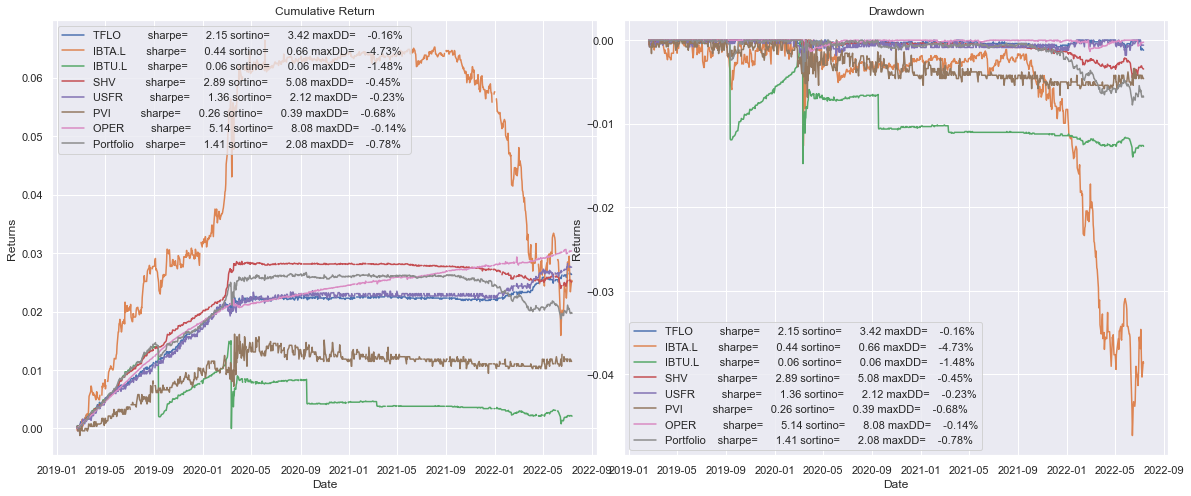

In [15]:
# portfolio = qs.utils.make_index(stocks)
n = stocks.shape[1]+1
# display(n)
labelFormat =  '{:12s} sharpe={:10.2f} sortino={:10.2f} maxDD={:10.2%}'
portfolio = stocks.mean(axis=1)
fig, ax = plt.subplots(ncols=2, nrows=1,gridspec_kw = {'wspace':0.05, 'hspace':0.01}, figsize=(20,8))
fig.patch.set_facecolor('white')
for i, stock in enumerate(stocks.columns):
    relevantData = stocks[stock].loc[stocks[stock].index>=maxStartDate]
    relevantLabel = labelFormat.format(stock,qs.stats.sharpe(relevantData),qs.stats.sortino(relevantData),qs.stats.max_drawdown(relevantData))
    ax[0].plot(qs.stats.compsum(relevantData), label=relevantLabel)
    ax[0].set_title(stock)
    ax[0].set_xlabel('Date')
    ax[0].set_ylabel('Percent Return')
    ax[1].plot(qs.stats.to_drawdown_series(relevantData), label=relevantLabel)
    ax[1].set_xlabel('Date')
    ax[1].set_ylabel('Percentage Drawdown')
relevantData = portfolio.loc[portfolio.index>=maxStartDate]
relevantLabel = labelFormat.format('Portfolio',qs.stats.sharpe(relevantData),qs.stats.sortino(relevantData),qs.stats.max_drawdown(relevantData))
ax[0].plot(qs.stats.compsum(relevantData), label=relevantLabel)
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Returns')
ax[0].legend()
ax[0].set_title('Cumulative Return')
ax[1].plot(qs.stats.to_drawdown_series(relevantData), label=relevantLabel)
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Returns')
ax[1].legend()
ax[1].set_title('Drawdown')
plt.show()

In [8]:
# report = qs.reports.metrics(mode='full', returns=stock)

In [9]:
# qs.reports.plots(mode='full', returns=stock) # shows basic/full metrics

In [10]:
# qs.reports.basic(returns=stock) # shows basic metrics and plots

                           Strategy
-------------------------  ----------
Start Period               2007-01-11
End Period                 2022-07-12
Risk-Free Rate             0.0%
Time in Market             32.0%

Cumulative Return          6.38%
CAGR﹪                     0.4%

Sharpe                     0.24
Prob. Sharpe Ratio         81.84%
Smart Sharpe               0.14
Sortino                    0.34
Smart Sortino              0.2
Sortino/√2                 0.24
Smart Sortino/√2           0.14
Omega                      1.21

Max Drawdown               -5.01%
Longest DD Days            540
Volatility (ann.)          1.75%
Calmar                     0.08
Skew                       2.43
Kurtosis                   1496.22

Expected Daily %           0.0%
Expected Monthly %         0.03%
Expected Yearly %          0.39%
Kelly Criterion            10.31%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.18%
Expected Shortfall (cVaR)  -0.18%

Max Consecutive Wins       4
M

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2014-10-29,2014-12-19,2015-12-28,425,-5.014396,-0.716896
2,2015-12-29,2016-02-16,2017-06-21,540,-0.769242,-0.749413
3,2014-10-15,2014-10-15,2014-10-16,1,-0.338264,0.000000
4,2014-10-22,2014-10-22,2014-10-28,6,-0.258662,0.000000
5,2018-02-21,2018-02-26,2018-02-27,6,-0.159122,-0.099470


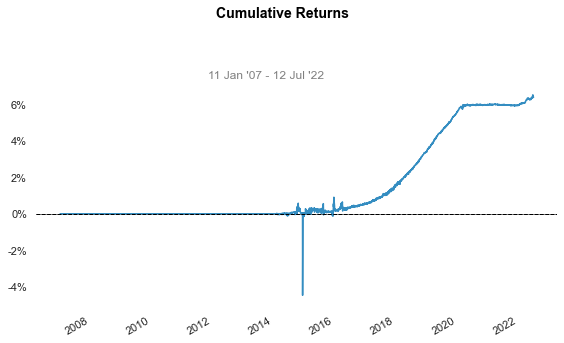

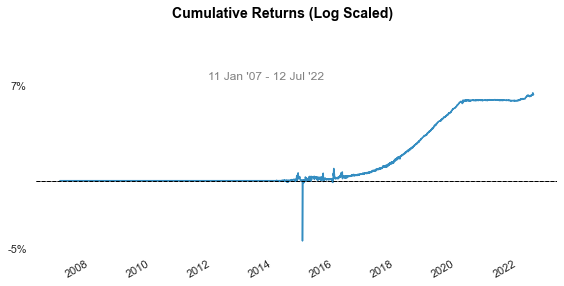

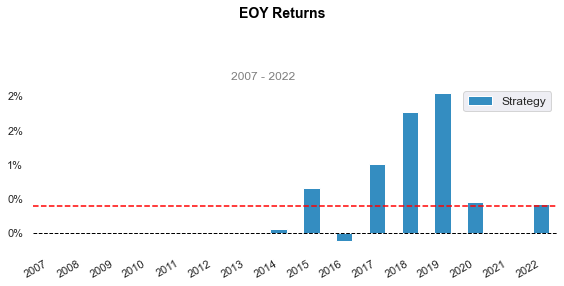

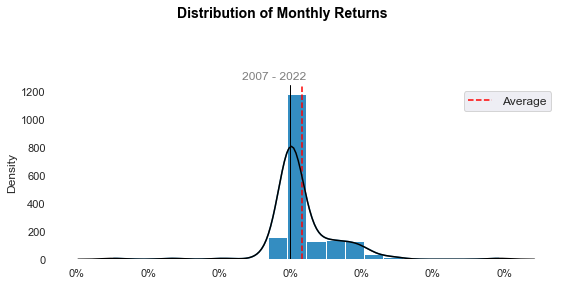

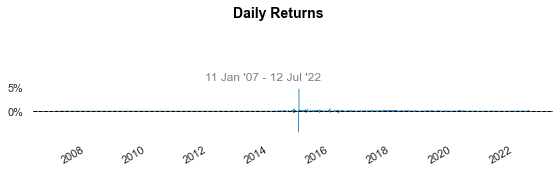

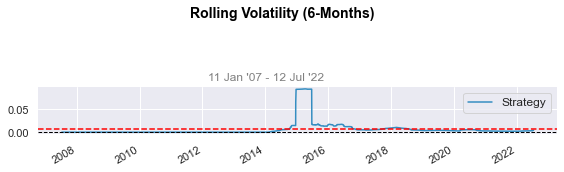

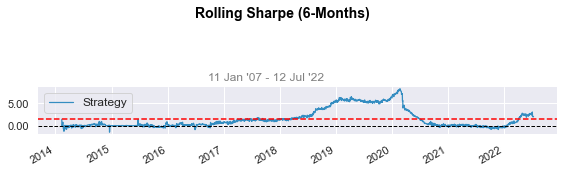

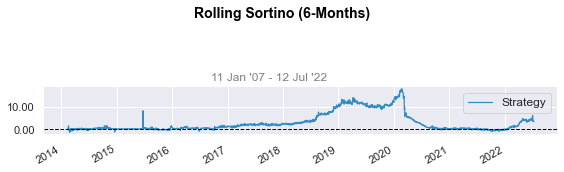

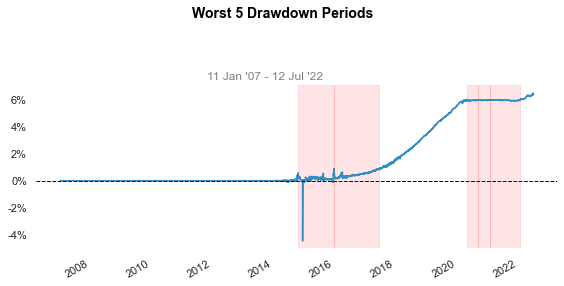

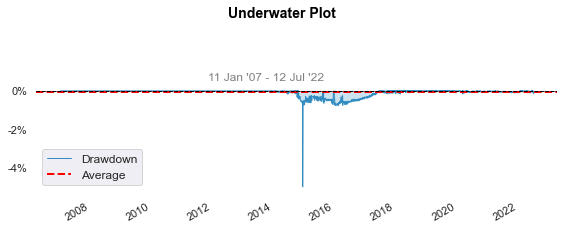

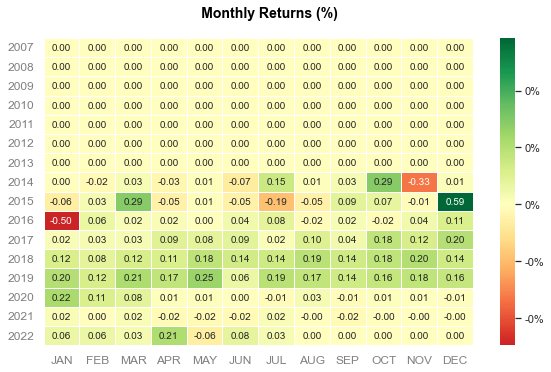

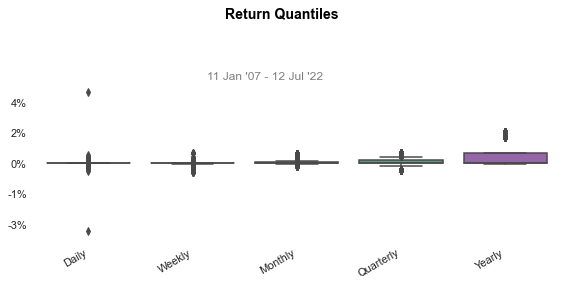

In [11]:
qs.reports.full(returns=stocks.iloc[:,0]) # shows full metrics and plots

In [12]:
# qs.reports.html(returns=stock) # generates a complete report as html